In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
sns.set(style="ticks", color_codes=True)
from PIL import Image
import requests
from io import BytesIO
from collections import Counter

### Data Exploration

In [90]:
# Import output file after processing pixels in icon jpg
# 3 new features created based on the Icon URL are:
# hypercent_c_cnt: count of colors taking more than 10% of the full image
# lpercent_c: count of colors taking less than 0.1% of the full image
# max_c_cnt: count of pixels of the color that appears the most in the icon

df = pd.read_csv("AppStore_Games_Icon_Pixel.csv")
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1,11463,202890
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,0,15786,15271
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,3,6762,110792
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,1,12098,204571
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,1,48043,59053
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,0,12182,13003
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,4+,NaN,6328320.0,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,1,58238,67802
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,4+,EN,64333824.0,Games,"Games, Strategy, Board",3/08/2008,3/10/2018,0,30002,4833
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",...,4+,FR,2657280.0,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,2,6828,54219
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,4+,EN,1466515.0,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008,0,44602,616


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 21 columns):
URL                             17007 non-null object
ID                              17007 non-null int64
Name                            17007 non-null object
Subtitle                        5261 non-null object
Icon URL                        17007 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           16983 non-null float64
In-app Purchases                7683 non-null object
Description                     17007 non-null object
Developer                       17007 non-null object
Age Rating                      17007 non-null object
Languages                       16947 non-null object
Size                            17006 non-null float64
Primary Genre                   17007 non-null object
Genres                          17007 non-null object
Original Release Date       

In [92]:
# Drop any records where Icon URL or Average User Rating are null

df = df.dropna(subset = ['Icon URL', 'Average User Rating'])
df.info()

# 7,561/17,007 (45%) records remaining where Icon URL and Average User Rating fields are not null 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7561 entries, 0 to 16993
Data columns (total 21 columns):
URL                             7561 non-null object
ID                              7561 non-null int64
Name                            7561 non-null object
Subtitle                        2724 non-null object
Icon URL                        7561 non-null object
Average User Rating             7561 non-null float64
User Rating Count               7561 non-null float64
Price                           7561 non-null float64
In-app Purchases                4634 non-null object
Description                     7561 non-null object
Developer                       7561 non-null object
Age Rating                      7561 non-null object
Languages                       7537 non-null object
Size                            7561 non-null float64
Primary Genre                   7561 non-null object
Genres                          7561 non-null object
Original Release Date           7561 non-

In [95]:
# Look at distribution of target variable Averate User Rating

#print('Unique values in 'Average User Rating' :\n', df['Average User Rating'].unique())
print(df['Average User Rating'].describe())

count    7561.000000
mean        4.060905
std         0.751428
min         1.000000
25%         3.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: Average User Rating, dtype: float64


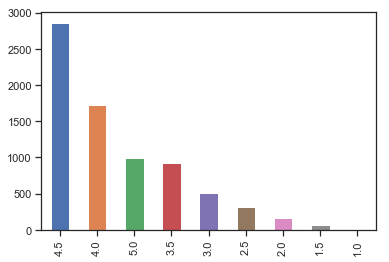

In [97]:
df['Average User Rating'].value_counts().plot('bar')

# Data set consists heavily of highly rated games...potentially impact model

#### Insights on games' icons with rating >= 4

In [51]:
# Create subset of data to determine any trends where:
# Average User Rating >= 4
# User Rating Count >= 50

df_highrating = df[(df['Average User Rating'] >=4) & (df['User Rating Count'] >= 50)]
df_highrating

# 3,027 records which have game rating of >=4 and User Rating Count >= 50

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",1.585357e+07,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1,11463,202890
24,https://apps.apple.com/us/app/boomshine/id2922...,292242592,Boomshine,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,637.0,0.99,NaN,Boomshine is an addictive casual game. Touch t...,...,4+,EN,2.287309e+07,Games,"Games, Puzzle, Entertainment, Strategy",7/10/2008,20/05/2017,3,12006,91713
26,https://apps.apple.com/us/app/fieldrunners/id2...,292421271,Fieldrunners,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",OVERVIEW\n\nThe invasion begins! Pint sized s...,...,9+,EN,7.504179e+07,Games,"Games, Entertainment, Action, Strategy",5/10/2008,11/04/2018,0,71425,1733
30,https://apps.apple.com/us/app/expert-sudoku/id...,294193726,Expert Sudoku,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,523.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",9.543680e+06,Games,"Games, Strategy, Entertainment, Puzzle",21/10/2008,30/05/2017,1,9203,192826
32,https://apps.apple.com/us/app/chess-genius/id2...,294631172,Chess Genius,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,156.0,5.99,NaN,"""ChessGenius, award winning chess program. Sup...",...,4+,"EN, FR, DE, IT, ES",1.751040e+06,Games,"Games, Strategy, Board, Entertainment",8/11/2008,5/08/2016,1,9942,163485
33,https://apps.apple.com/us/app/chess-tchess-pro...,295445501,Chess - tChess Pro,For beginners to professionals,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3062.0,7.99,NaN,"tChess Pro is the high-quality, critically acc...",...,4+,"EN, FR, DE, JA, KO, ZH",7.517184e+06,Games,"Games, Board, Entertainment, Strategy",5/11/2008,7/04/2019,1,9,77042
41,https://apps.apple.com/us/app/strategery/id298...,298908505,Strategery,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,2798.0,1.99,NaN,Strategery is a fast-paced game of world domin...,...,4+,EN,1.554739e+07,Games,"Games, Board, Strategy, Entertainment",9/12/2008,17/06/2017,0,15469,4127
43,https://apps.apple.com/us/app/deep-green-chess...,299471086,Deep Green Chess,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.0,483.0,7.99,NaN,A beautiful and elegant chess application for ...,...,4+,EN,9.901978e+07,Games,"Games, Board, Strategy",9/12/2008,28/01/2016,0,19423,724
45,https://apps.apple.com/us/app/lux-dlx-3-map-co...,299813413,Lux DLX 3 - Map Conquest Game,World Domination Supreme!,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,5629.0,4.99,NaN,Lux DLX is an epic game of strategy & conquest...,...,9+,"DA, NL, EN, FR, DE, IT, NO, NB, PT, ES, SV",9.399398e+07,Games,"Games, Strategy, Board, Entertainment",19/12/2008,26/03/2019,0,80747,1017
49,https://apps.apple.com/us/app/kakinoki-shogi-j...,301163765,Kakinoki Shogi (Japanese Chess),NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.0,75.0,4.99,NaN,Shogi is a Japanese version of chess.\nA playe...,...,4+,"EN, JA",1.843200e+07,Games,"Games, Strategy, Board",19/01/2009,24/09/2015,2,8799,118800


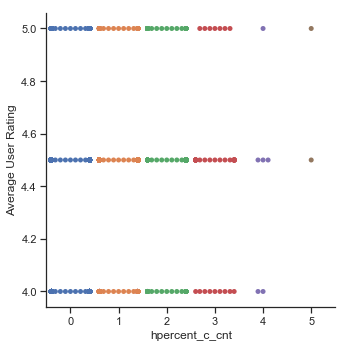

In [52]:
# Determine any trends based on Average User Rating, and hypercent_c_cnt

sns.catplot(x="hpercent_c_cnt", y="Average User Rating", kind="swarm", data=df_highrating);

In [62]:
df_highrating.groupby(['hpercent_c_cnt','Average User Rating'])['ID'].count()

# For high rated games, majority of icons have 0 color that takes up more than 10% of the full image 

hpercent_c_cnt  Average User Rating
0               4.0                     676
                4.5                    1435
                5.0                     206
1               4.0                     153
                4.5                     277
                5.0                      55
2               4.0                      37
                4.5                      91
                5.0                      41
3               4.0                       9
                4.5                      32
                5.0                       7
4               4.0                       2
                4.5                       3
                5.0                       1
5               4.5                       1
                5.0                       1
Name: ID, dtype: int64

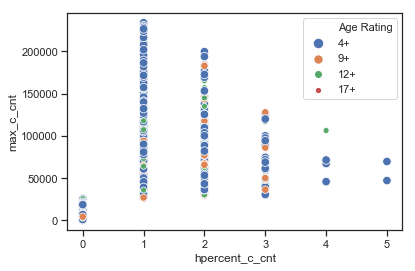

In [61]:
ax = sns.scatterplot(x="hpercent_c_cnt", y="max_c_cnt",  hue="Age Rating", size = "Age Rating", data=df_highrating)

# For high rated games, majority of game icons have 0 color taking more than 10% of full image

In [128]:
df_highrating2 = df_highrating[(df_highrating['hpercent_c_cnt'] == 0)]
df_highrating2

# 2,317 records with high rating (>=4) and where 0 color take >10% of icon image

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt
26,https://apps.apple.com/us/app/fieldrunners/id2...,292421271,Fieldrunners,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,41869.0,2.99,"0.99, 0.99, 0.99, 0.99",OVERVIEW\n\nThe invasion begins! Pint sized s...,...,9+,EN,7.504179e+07,Games,"Games, Entertainment, Action, Strategy",5/10/2008,11/04/2018,0,71425,1733
41,https://apps.apple.com/us/app/strategery/id298...,298908505,Strategery,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,2798.0,1.99,NaN,Strategery is a fast-paced game of world domin...,...,4+,EN,1.554739e+07,Games,"Games, Board, Strategy, Entertainment",9/12/2008,17/06/2017,0,15469,4127
43,https://apps.apple.com/us/app/deep-green-chess...,299471086,Deep Green Chess,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.0,483.0,7.99,NaN,A beautiful and elegant chess application for ...,...,4+,EN,9.901978e+07,Games,"Games, Board, Strategy",9/12/2008,28/01/2016,0,19423,724
45,https://apps.apple.com/us/app/lux-dlx-3-map-co...,299813413,Lux DLX 3 - Map Conquest Game,World Domination Supreme!,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,5629.0,4.99,NaN,Lux DLX is an epic game of strategy & conquest...,...,9+,"DA, NL, EN, FR, DE, IT, NO, NB, PT, ES, SV",9.399398e+07,Games,"Games, Strategy, Board, Entertainment",19/12/2008,26/03/2019,0,80747,1017
55,https://apps.apple.com/us/app/arcs/id302510211,302510211,Arcs,Circular puzzle game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,413.0,2.99,NaN,Arcs is a spin on the classic sliding tile puz...,...,4+,EN,5.106688e+06,Games,"Games, Puzzle, Entertainment, Strategy",21/01/2009,10/05/2018,0,20356,8086
59,https://apps.apple.com/us/app/wedding-dash-del...,303337299,Wedding Dash Deluxe,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,17056.0,0.99,"0.0, 0.99, 5.99, 0.99, 0.99, 0.99, 0.99, 0.99,...",* Play the most romantic Dash game! With over ...,...,4+,EN,5.580390e+07,Games,"Games, Strategy, Action, Entertainment",28/01/2009,2/07/2014,0,89516,3119
68,https://apps.apple.com/us/app/wedding-dash/id3...,305123066,Wedding Dash,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,101209.0,0.00,"2.99, 2.99, 5.99, 0.99, 0.0, 0.99, 0.99, 0.99,...","***For a limited time, get the Niagara Falls v...",...,4+,EN,5.834342e+07,Games,"Games, Strategy, Action, Entertainment",18/02/2009,2/07/2014,0,85397,3722
78,https://apps.apple.com/us/app/sallys-spa/id307...,307132353,"""Sally's Spa""","Design Manage Build, have Fun!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.5,35199.0,2.99,NaN,\u25a0 \u25a0 \u25a0 \u25a0 \u25a0 Sally\'s S...,...,4+,"EN, FR, DE, IT, ES",5.005015e+08,Games,"Games, Strategy, Entertainment, Action",8/04/2009,11/09/2017,0,93600,18200
87,https://apps.apple.com/us/app/bloons/id310251116,310251116,Bloons,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,16693.0,0.99,NaN,NOW 150 EXCLUSIVE LEVELS! \n\n****************...,...,4+,EN,5.500291e+06,Games,"Games, Strategy, Puzzle",14/04/2009,7/02/2012,0,70700,11438
89,https://apps.apple.com/us/app/chess-premium/id...,311395924,Chess Premium,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,2767.0,1.99,NaN,"""Are you tired of playing chess games that loo...",...,4+,EN,3.074662e+07,Games,"Games, Entertainment, Board, Strategy",23/04/2009,28/09/2017,0,16170,21718


In [129]:
df_highrating2.groupby(['max_c_cnt'])['ID'].count()

# For high rated games, majority of game icons have 0 color taking more than 10% of full image, and <27,000 pixels of the color that appear the most in the icon

max_c_cnt
46       1
57       1
77       1
85       1
106      1
108      2
113      1
116      3
124      1
125      1
128      1
132      2
134      1
140      1
141      1
150      1
154      1
156      1
157      1
173      1
177      1
179      1
180      1
183      1
186      1
187      1
188      2
190      1
195      1
196      1
        ..
24918    1
25096    1
25103    1
25172    1
25189    1
25195    1
25249    1
25310    1
25313    1
25350    1
25355    1
25398    1
25458    1
25473    1
25573    1
25640    1
25649    1
25656    1
25698    1
25722    1
25773    1
25799    1
25828    1
25861    1
25925    1
25998    1
26036    1
26081    1
26120    1
26176    1
Name: ID, Length: 2088, dtype: int64

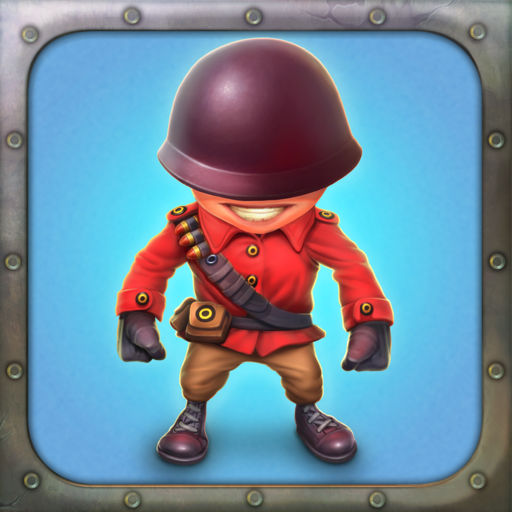

In [72]:
# Look at some icons to see if assumption that high rated games' icons have 0 color taking more than 10% of full image and <27, 000 pixels of the color that appear the most in the icon

url = 'https://is1-ssl.mzstatic.com/image/thumb/Purple128/v4/b3/16/1f/b3161f9a-b708-401d-f949-c263d203af51/source/512x512bb.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content),'r')
img

# Name: Fieldrunners
# Average User Rating: 4
# User Rating Count: 41,869
# hypercent: 0
# max_c_cnt: 1,733

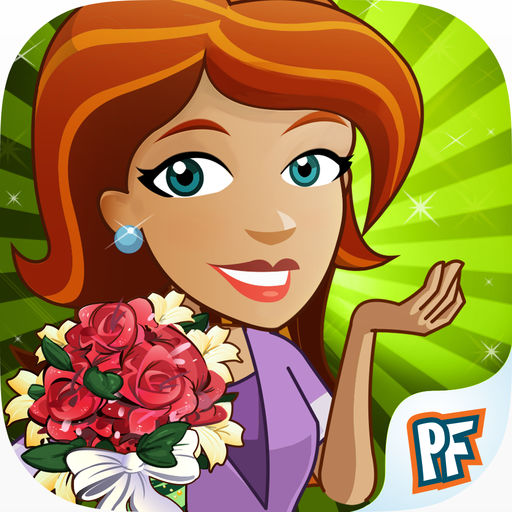

In [74]:
url = 'https://is4-ssl.mzstatic.com/image/thumb/Purple/v4/d8/53/b3/d853b3a9-c1ea-157e-03a8-2f8d94235a89/source/512x512bb.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content),'r')
img

# Name:  Wedding Dash Deluxe
# Average User Rating: 4.5
# User Rating Count: 17,056
# hypercent: 0
# max_c_cnt: 3,119

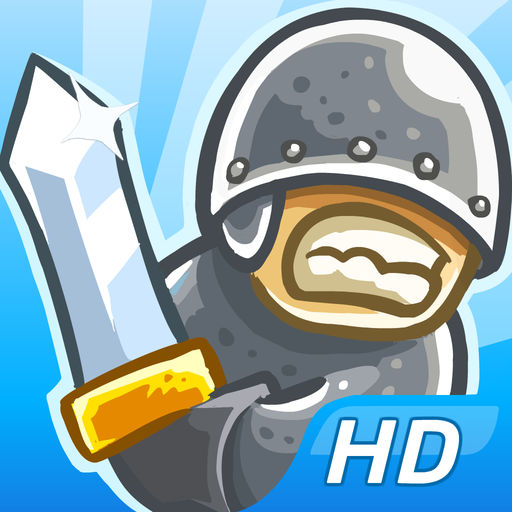

In [75]:
url = 'https://is4-ssl.mzstatic.com/image/thumb/Purple123/v4/93/8d/9e/938d9ee7-7807-d66f-e7bb-995b646789b1/source/512x512bb.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content),'r')
img

# Name:  Kingdom Rush HD
# Average User Rating: 5
# User Rating Count: 36,212
# hypercent: 0
# max_c_cnt: 10,631

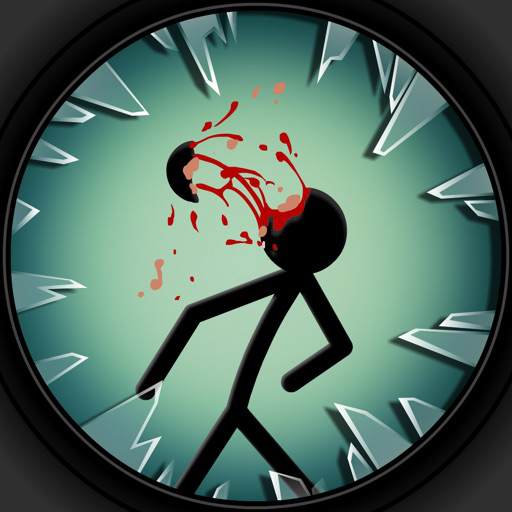

In [79]:
url = 'https://is4-ssl.mzstatic.com/image/thumb/Purple118/v4/12/79/24/12792430-145c-5253-32d0-cf81aa96f009/source/512x512bb.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content),'r')
img

# Name:  A Retro Sniper Adventure
# Average User Rating: 5
# User Rating Count: 12,416
# hypercent: 0
# max_c_cnt: 19,316

### Data Modeling

In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### a) Random Forest Classifier

In [ ]:
# Target Variable: Average User Rating
# Feature Variables: hpercent_c_cnt, max_c_cnt

In [124]:
# Create 2 additional features to classify where hypercent_c_cnt = 0 and max_c_cnt < 27,000

def f(row):
    if row['hpercent_c_cnt'] == 0:
        val = 1
    else:
        val = 0
    return val

In [157]:
df['hpercent_is_0'] = df.apply(f,axis=1)
df

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Primary Genre,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt,0_color_take_more10percent,hpercent_is_0,max_c_cnt_is_less_27000
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1,11463,202890,0,0,0
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,0,15786,15271,1,1,1
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,3,6762,110792,0,0,0
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,1,12098,204571,0,0,0
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,1,48043,59053,0,0,0
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,0,12182,13003,1,1,1
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,1,58238,67802,0,0,0
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,Games,"Games, Strategy, Board",3/08/2008,3/10/2018,0,30002,4833,1,1,1
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",...,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,2,6828,54219,0,0,0
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008,0,44602,616,1,1,1


In [132]:
def f2(row):
    if row['max_c_cnt'] < 27000:
        val = 1
    else:
        val = 0
    return val

In [158]:
df['max_c_cnt_is_less_27000'] = df.apply(f2,axis=1)
df

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Primary Genre,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt,0_color_take_more10percent,hpercent_is_0,max_c_cnt_is_less_27000
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1,11463,202890,0,0,0
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,0,15786,15271,1,1,1
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,3,6762,110792,0,0,0
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,1,12098,204571,0,0,0
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,1,48043,59053,0,0,0
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,0,12182,13003,1,1,1
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,1,58238,67802,0,0,0
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,Games,"Games, Strategy, Board",3/08/2008,3/10/2018,0,30002,4833,1,1,1
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",...,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,2,6828,54219,0,0,0
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008,0,44602,616,1,1,1


In [174]:
def f3(row):
    if row['Average User Rating'] >= 4:
        val = 1
    else:
        val = 0
    return val

In [175]:
df['Great_App'] = df.apply(f3,axis=1)
df

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Genres,Original Release Date,Current Version Release Date,hpercent_c_cnt,lpercent_c_cnt,max_c_cnt,0_color_take_more10percent,hpercent_is_0,max_c_cnt_is_less_27000,Great_App
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,1,11463,202890,0,0,0,1
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,"Games, Strategy, Board",11/07/2008,17/05/2018,0,15786,15271,1,1,1,0
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,"Games, Board, Strategy",11/07/2008,5/09/2017,3,6762,110792,0,0,0,0
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,1,12098,204571,0,0,0,0
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,1,48043,59053,0,0,0,0
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",...,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,0,12182,13003,1,1,1,0
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,0.00,NaN,"""Gravitation is a new implementation of the pu...",...,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,1,58238,67802,0,0,0,0
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,0.99,NaN,"""50 levels of addictive puzzling strategy fun!...",...,"Games, Strategy, Board",3/08/2008,3/10/2018,0,30002,4833,1,1,1,0
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,0.00,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",...,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017,2,6828,54219,0,0,0,0
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,0.00,NaN,Barrels O\u2019 Fun is a simple but challengin...,...,"Games, Casual, Strategy",1/08/2008,1/08/2008,0,44602,616,1,1,1,0


##### Model Building: Random Forest Classifier where feature variables are hypercent_c_cnt and max_c_cnt

In [179]:
X = df[['hpercent_c_cnt','max_c_cnt']] # feature variables tried: hpercent_c_cnt & max_c_cnt ; or aggregated view hpercent_is_0 & max_c_cnt_is_less_27000
y = df['Great_App']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

rf = RandomForestClassifier(n_estimators=100)

rf.fit(X_train, y_train)

# Predictions
rf_predict = rf.predict(X_test)

In [180]:
# Evaluate performance

print("Accuracy:",rf.score(X_test, y_test))

# 63% of time the classifer is able to make correct prediction

Accuracy: 0.6319964742177171


##### Fine Tuning of Model: Random Forest Classifier where feature variables are hypercent_is_0 and max_c_cnt_is_less_27000

In [199]:
X = df[['hpercent_is_0','max_c_cnt_is_less_27000']] # feature variables tried: hpercent_c_cnt & max_c_cnt ; or aggregated view hpercent_is_0 & max_c_cnt_is_less_27000
y = df['Great_App']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

rf2 = RandomForestClassifier(n_estimators=100)

rf2.fit(X_train, y_train)

# Predictions
rf2_predict = rf2.predict(X_test)

In [200]:
# Evaluate performance

print("Accuracy:",rf2.score(X_test, y_test))

# 73% of time the classifer is able to make correct prediction; improvement in accuracy from intial model built

Accuracy: 0.7333627148523578


In [201]:
rf2_cv_score = cross_val_score(rf2, X, y, cv=10, scoring='roc_auc')

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf2_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, rf2_predict))
print('\n')

print("=== All AUC Scores ===")

print(rf2_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf2_cv_score.mean())

=== Confusion Matrix ===
[[   0  605]
 [   0 1664]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       605
           1       0.73      1.00      0.85      1664

   micro avg       0.73      0.73      0.73      2269
   macro avg       0.37      0.50      0.42      2269
weighted avg       0.54      0.73      0.62      2269



=== All AUC Scores ===
[0.436497   0.45195962 0.4696196  0.45510767 0.50147055 0.50494844
 0.51503478 0.46703445 0.53500898 0.48154344]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.4818224538568163


C:\Users\leona\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\leona\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\leona\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Measure of performance of Random Forest model:

Confusion Matrix Results: 
Model accurately predicted 1664 / 2269 (73%) cases that the game is a Great App (high rating of 4 or higher). However, there are 605 cases (25%) cases where the model incorrectly predicted that the game is a Great App, when based on the actual average user ratings from the data set, the games had low ratings.

Classification Report Results: 
73% precision classifying that a game is a Great App based on feature variables hpercent_is_0 and max_c_cnt_is_less_27000 (0 color taking >10% of game icon, <27,000 pixels of the most frequent color present in icon).
100% recall indicating 100% of all the game icons with high rating were correctly labled by the Random Forest classifier. 
F1 score of 85%, measuring test's accuracy as weighted harmonic mean of precision and recall. Overall, Random Forest good at recognizing game with high rating.

Mean AUC Score:
Mean AUC score value of 0.48 indicates a mediocre classifier, being able to distinguish between highly rated games versus low rated games. 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# Comparison between prediction vs actual if great app

In [167]:
X = df[['hpercent_c_cnt','max_c_cnt']] # feature variables tried: hpercent_c_cnt & max_c_cnt ; or aggregated view hpercent_is_0 & max_c_cnt_is_less_27000
y = df['Average User Rating'] # target variable

In [168]:
# Split data intro training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42) # 70% training, 30% test


In [169]:
# Establish Random Forest Model

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

# Predictions
rf_predict = rf.predict(X_test)

##### Evaluate Performance

In [170]:
# Evaluate Model's Accuracy
# After training, check accuracy using actual and predicted values

print("Accuracy:",rf.score(X_test, y_test))

# -0.46% of time the classifer is able to make correct prediction 

Accuracy: -0.46679210981187214


In [172]:
rf_cv_score = cross_val_score(rf, X, y, cv=10, scoring= 'roc_auc')

ValueError: continuous format is not supported

In [156]:
# Check Accuracy of Model

pd.crosstab(y_test, rf_predict, rownames=['Actual Result'],colnames=['Predicted Result'])

Predicted Result,4.0194682314960835,4.052908746597881,4.105316345415003
Actual Result,,,
1.0,0,2,2
1.5,0,15,3
2.0,0,37,18
2.5,0,62,35
3.0,0,120,53
3.5,3,176,81
4.0,4,358,148
4.5,6,645,225
5.0,1,156,119


#### b) Naive Bayes Classifier